In [ ]:
import torch
import pandas as pd
import os

In [ ]:
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [ ]:
cat ../data/house_tiny.csv

NumRooms,Alley,Price
NA,Pave,127500
2,NA,106000
4,NA,178100
NA,NA,140000


In [ ]:
data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [ ]:
# split inputs by integer-based-location (iloc) and substitute missing input values by mean values
inputs, outputs = data.iloc[:,0:2], data.iloc[:,-1]
inputs = inputs.fillna(inputs.mean())
inputs

,NumRooms,Alley
0,3.0,Pave
1,2.0,NaN
2,4.0,NaN
3,3.0,NaN


In [ ]:
# convert categorical variables to dummies
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [ ]:
# Convert to tensors
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [ ]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])

In [ ]:
A.sum(axis=0), A.sum(axis=1)

(tensor([40., 45., 50., 55.]), tensor([ 6., 22., 38., 54., 70.]))

In [ ]:
A.sum(axis=1, keepdims=True)

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [ ]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

In [ ]:
x = torch.arange(4, dtype=torch.float32)

In [ ]:
A.shape, x.shape, torch.mv(A,x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

In [ ]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

### Calculus

In [ ]:
%matplotlib inline
import numpy as np
from IPython import display
import torch

def f(x):
    return 3 * x**2 - 4*x

In [ ]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [ ]:
print(f'a={1+1:.5f}')

a=2.00000


### Plotting functions

In [ ]:
#@save
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    display.set_matplotlib_formats('svg')

In [ ]:
#@save
def set_figsize(figsize=(3.5, 2.5)): 
    """Set the figure size for matplotlib"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [ ]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale,legend):
    """Set the axes for matplotlib"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()

In [ ]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
        ylim=None, xscale='linear', yscale='linear',
        fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points"""
    if legend is None:
        legend = []
        
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    # Return True if 'X' (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or 
                isinstance(X, list) and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
        print("X has one axis")
    if Y is None:
        # use X zero points as X and X as Y
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
        print("Y has one axis")
     # if different length, than take X for each Y output:
    """
    x = [1,2,3]
    y = [f(x), f(x+a)]
    Then we will plot x,f(x) and x,f(x+a)
    """
    if len(X) != len(Y):
        X = X * len(Y)
        print("Adjust length of X")
    # clear current axes
    axes.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)        

X has one axis
Adjust length of X


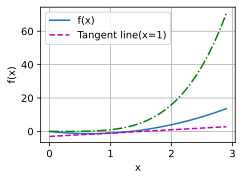

In [ ]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2*x-3], 'x', 'f(x)', legend=['f(x)', 'Tangent line(x=1)'])

### Exercises

In [ ]:
import d2l
import numpy as np
%load_ext autoreload
%autoreload 2

In [ ]:
X = np.arange(0.1, 10, 0.1)
Y = X**3 - (1/X)
Y_prime = 3*X**2 + (1/X)**2

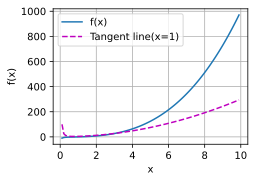

In [ ]:
d2l.plot(X,[Y, Y_prime],
         xlabel='x',
         ylabel='f(x)',
         legend=['f(x)', 'Tangent line(x=1)'])

## Automatic Differentiation

In [1]:
import torch

Calculate gradient of $y=2X^TX$

In [2]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [3]:
x.requires_grad_(True)
x.grad # the default value is None

In [4]:
y = 2 * torch.dot(x, x)
y, y.shape

(tensor(28., grad_fn=<MulBackward0>), torch.Size([]))

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [6]:
4*x == x.grad

tensor([True, True, True, True])

In [7]:
# PyTorch accumulates the gradient, we need to clear the previous
# values
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [8]:
# Invoking `backward` on a non-scalar requires passing in a `gradient` argument
# which specifies the gradient of the differentiated function w.r.t `self`.
# In our case, we simply want to sum the partial derivatives, so passing
# in a gradient of ones is appropriate
x.grad.zero_()
y = x * x
# y.backward(torch.ones(len(x))) equivalent to the below
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [9]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.backward(gradient=torch.ones(len(x)))
#z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [15]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [26]:
a = torch.rand(size=(), requires_grad=True)
d = f(a)
d.backward()

In [19]:
a.grad == d / a

tensor(True)

### Exercise

In [53]:
x = torch.arange(-3, 3, 0.1, requires_grad = True)
f = torch.sin(x)
# we use sum because `backward()` expects to be called on a scalar!
f.sum().backward()

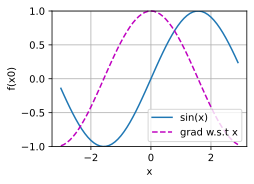

In [54]:
d2l.plot(x.detach(), [f.detach(),x.grad.detach()],
        xlabel='x', ylabel='f(x0)', legend=['sin(x)', 'grad w.s.t x'],
        ylim=[-1,1])

In [55]:
x.grad == torch.cos(x)

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True])

In [57]:
f.sum()

tensor(-0.1411, grad_fn=<SumBackward0>)

In [58]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__p

In [65]:
help(d2l.plot)

Help on function plot in module d2l:

plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear', fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None, verbose=False)
    Plot data points

